In [8]:
# Task 3: Correlation Between Stock Movement Across Multiple Stocks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [9]:
stocks = ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv']


In [10]:
stock_data = pd.DataFrame()

In [12]:
for stock_file in stocks:
    df = pd.read_csv('../data/'+stock_file)
    df['Stock'] = stock_file.split('_')[0]  # Add a column to identify the stock
    stock_data = pd.concat([stock_data, df], ignore_index=True)


In [13]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [14]:
stock_data = stock_data.sort_values(['Stock', 'Date'])


In [15]:
stock_data['Daily Return'] = stock_data.groupby('Stock')['Close'].pct_change()


In [16]:
stock_data = stock_data.dropna()


In [17]:
correlation_results = {}


In [18]:
for stock in stock_data['Stock'].unique():
    stock_df = stock_data[stock_data['Stock'] == stock]
    correlation, p_value = pearsonr(stock_df['Volume'], stock_df['Daily Return'])
    correlation_results[stock] = {'Correlation': correlation, 'P-Value': p_value}
    print(f"{stock} - Pearson Correlation Coefficient: {correlation}, P-Value: {p_value}")


AAPL - Pearson Correlation Coefficient: 0.0009225143672129702, P-Value: 0.9229408529711598
AMZN - Pearson Correlation Coefficient: 0.16151695140197878, P-Value: 3.121591335633362e-41
GOOG - Pearson Correlation Coefficient: 0.03592907969333617, P-Value: 0.010909638507730659


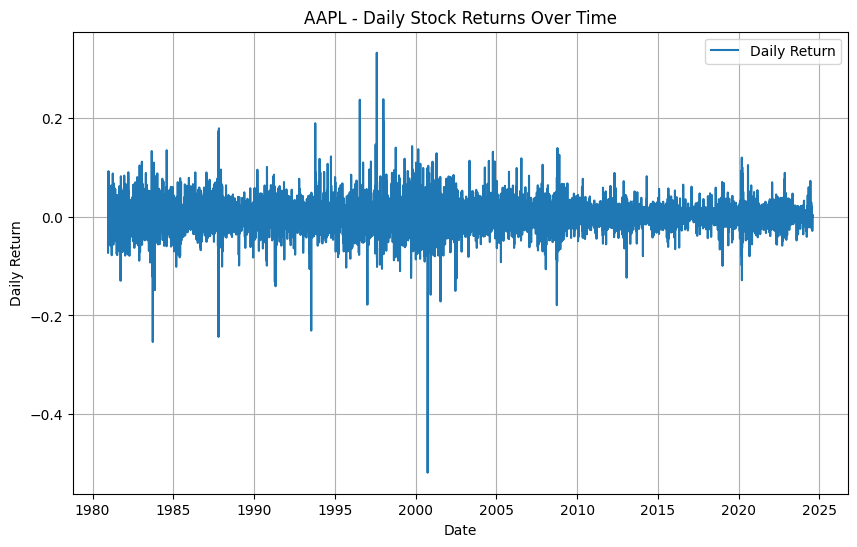

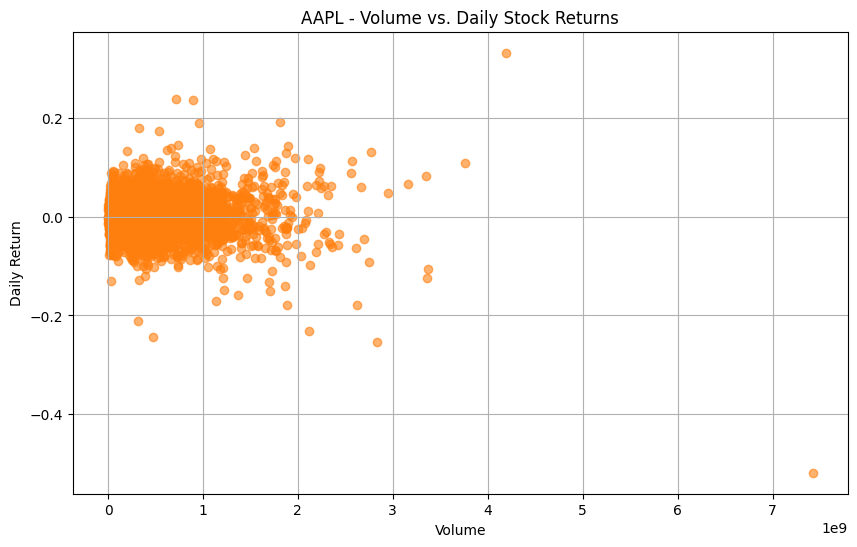

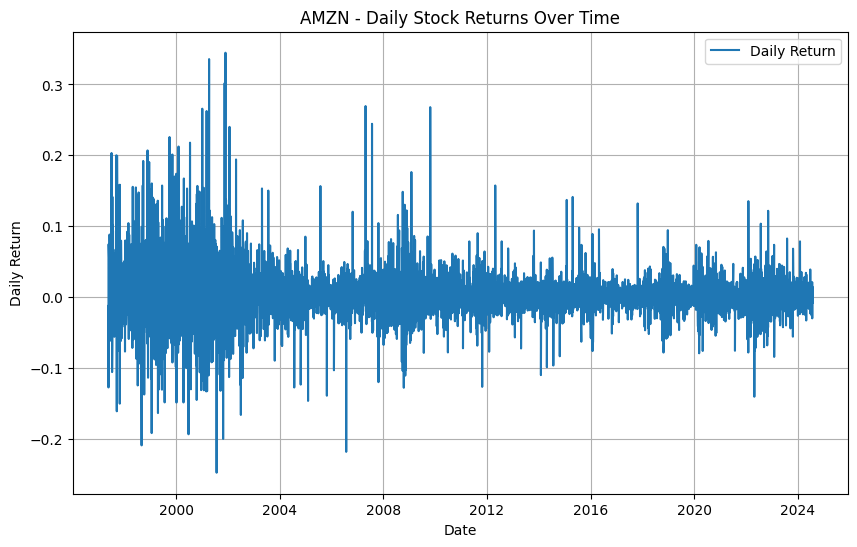

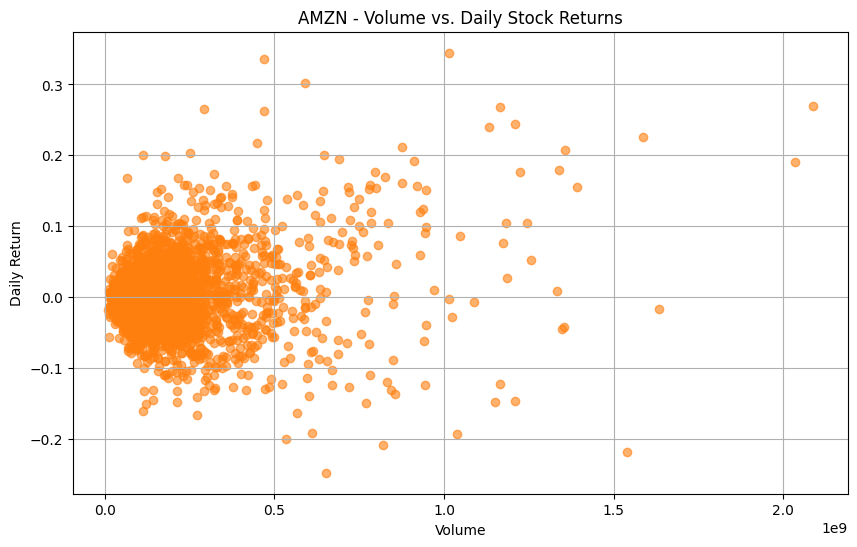

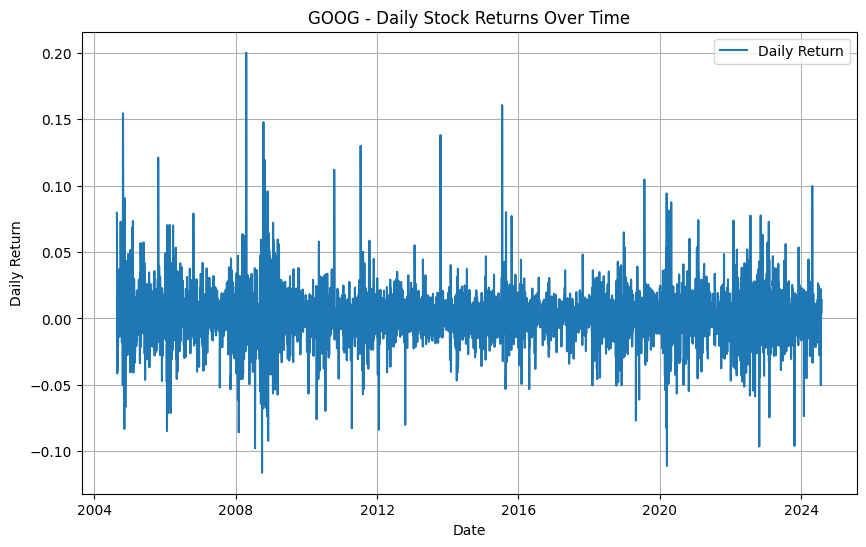

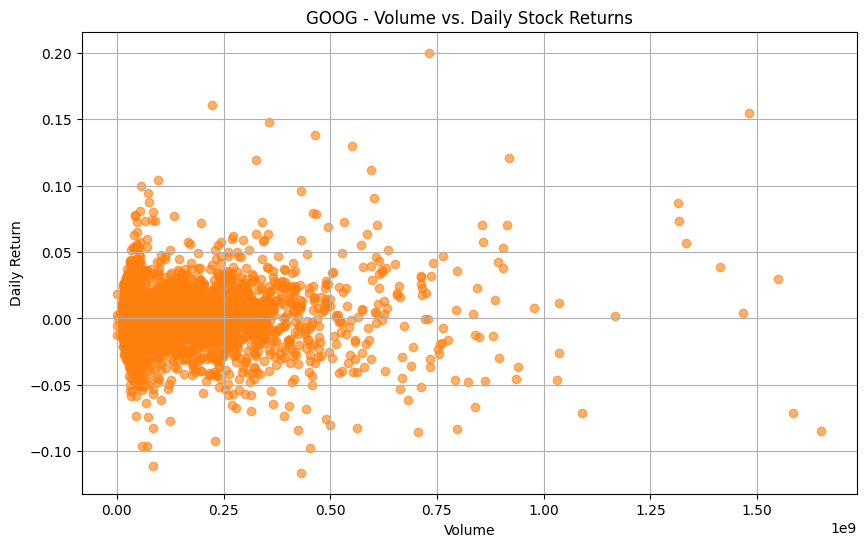

In [19]:
for stock in stock_data['Stock'].unique():
    stock_df = stock_data[stock_data['Stock'] == stock]

    # Plot daily returns over time
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['Date'], stock_df['Daily Return'], label='Daily Return', color='tab:blue')
    plt.title(f'{stock} - Daily Stock Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.grid()
    plt.legend()
    plt.show()

    # Plot Volume vs. Daily Returns
    plt.figure(figsize=(10, 6))
    plt.scatter(stock_df['Volume'], stock_df['Daily Return'], alpha=0.6, color='tab:orange')
    plt.title(f'{stock} - Volume vs. Daily Stock Returns')
    plt.xlabel('Volume')
    plt.ylabel('Daily Return')
    plt.grid()
    plt.show()

# Save processed data for further use
stock_data.to_csv("processed_stock_data.csv", index=False)
